In [1]:
%load_ext autoreload
%autoreload 1
%aimport Joint_Generation,utils,Alternating_Minimization

import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize
import random
from utils import *
from Joint_Generation import *
from Alternating_Minimization import *
import math
import scipy
import scipy.linalg
import scipy.stats
from sklearn.linear_model import LinearRegression, Lasso

In [2]:
#Dimension settings
p = 100
D1 = 32
D2 = 32
N = 1000
p1 = 4
p2 = 4
d1 = 8
d2 = 8
mux = np.zeros((p))
muy = np.zeros((D1*D2))

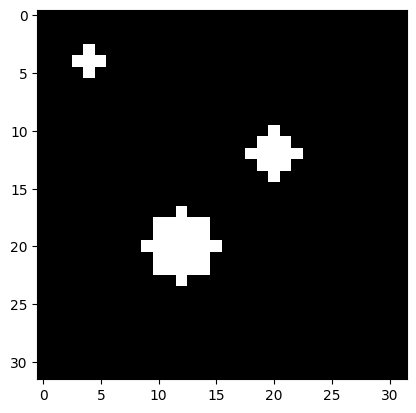

In [3]:
C_true = np.load('3-block.npy')
C_vec = C_true.reshape(D1*D2,1)
plt.imshow(C_true,cmap="gray")

TPR of theta is:  1.0
FPR of theta is:  0.10526315789473684
TPR of C is:  1.0
FPR of C is:  0.14841351074718526


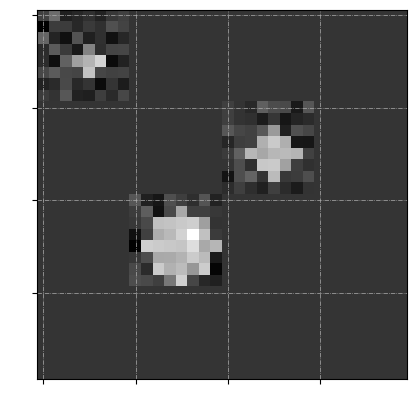

TPR of theta is:  0.6
FPR of theta is:  0.16842105263157894
TPR of C is:  1.0
FPR of C is:  0.21392016376663256


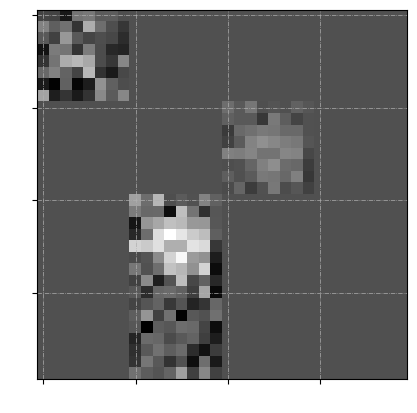

TPR of theta is:  1.0
FPR of theta is:  0.07368421052631578
TPR of C is:  1.0
FPR of C is:  0.14841351074718526


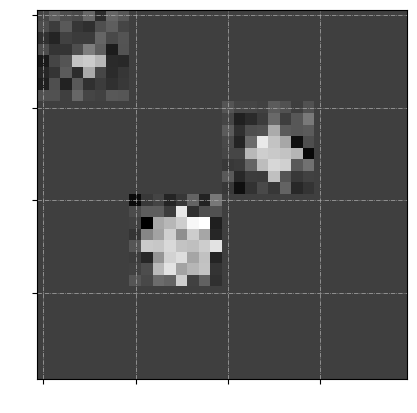

TPR of theta is:  1.0
FPR of theta is:  0.12631578947368421
TPR of C is:  1.0
FPR of C is:  0.14841351074718526


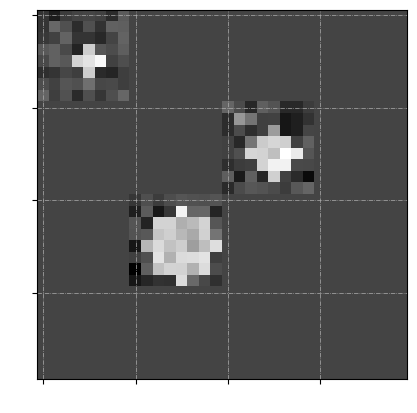

TPR of theta is:  1.0
FPR of theta is:  0.12631578947368421
TPR of C is:  0.8936170212765957
FPR of C is:  0.1535312180143296


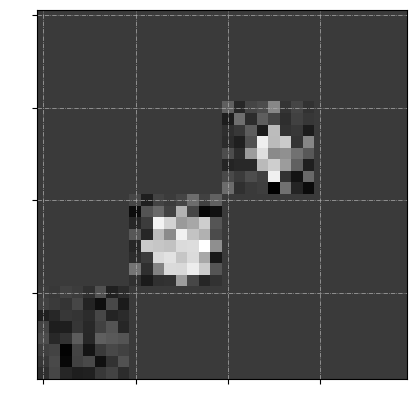

TPR of theta is:  1.0
FPR of theta is:  0.11578947368421053
TPR of C is:  1.0
FPR of C is:  0.14841351074718526


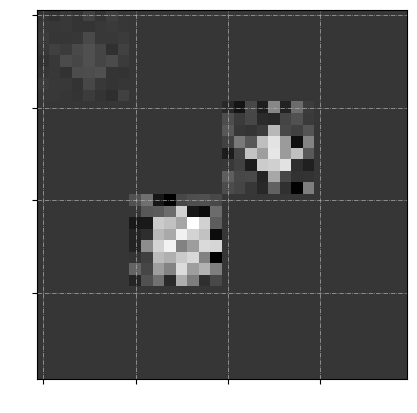

TPR of theta is:  1.0
FPR of theta is:  0.17894736842105263
TPR of C is:  1.0
FPR of C is:  0.14841351074718526


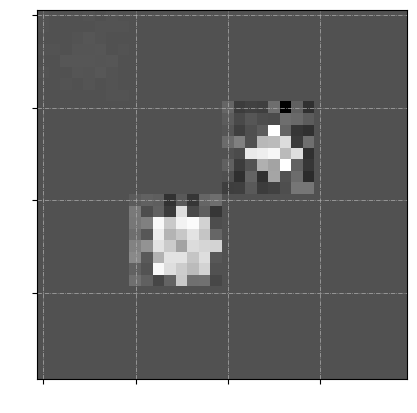

TPR of theta is:  1.0
FPR of theta is:  0.11578947368421053
TPR of C is:  1.0
FPR of C is:  0.14841351074718526


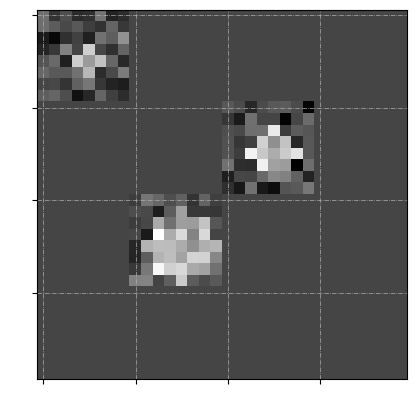

TPR of theta is:  1.0
FPR of theta is:  0.15789473684210525
TPR of C is:  1.0
FPR of C is:  0.14841351074718526


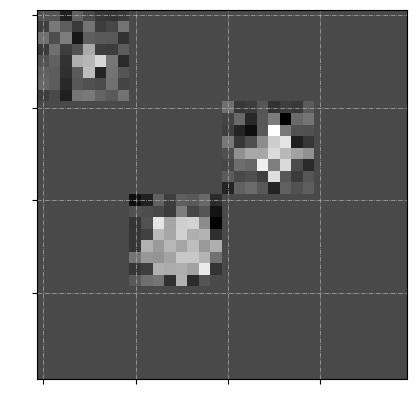

TPR of theta is:  0.4
FPR of theta is:  0.14736842105263157
TPR of C is:  0.8936170212765957
FPR of C is:  0.4155578300921187


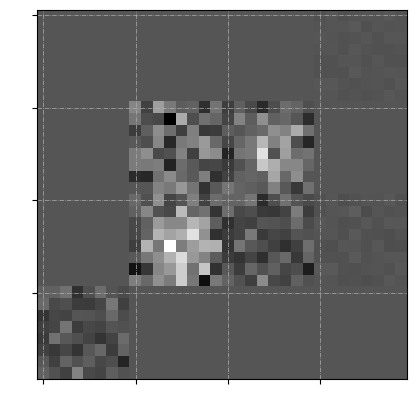

Mean TPR for C is:  0.9787234042553191
Mean FPR for C is:  0.18219037871033777
Mean TPR for theta is:  0.9
Mean FPR for theta is:  0.13157894736842107
Mean MSE for C is:  0.29507731117367103
Mean MSE for theta is:  0.6023376948030609


In [7]:
nsim = 10
tpr_theta = np.zeros(nsim)
fpr_theta = np.zeros(nsim)
tpr_C = np.zeros(nsim)
fpr_C = np.zeros(nsim)
err_c = np.zeros(nsim)
err_theta = np.zeros(nsim)
for i in range(nsim):
    X,Y,Yarray,theta,z,indx = data_generation(N=N,rho1=0.8,rho2=0.6,p=100,D1=D1,D2=D2,mux=mux,muy=muy,C_vec=C_vec,C_true=C_true,type="identity",verbose=False)
    a,b,thetahat = cca_alt_minimization(N,X,Yarray,z,lam1=0.0011,lam2=0.0002,R=3,tau_x=0.01,tau_y=0.01,p1=p1,p2=p2,d1=d1,d2=d2,p=p,niter=5,init='uniform')
    TPR_theta, FPR_theta, theta_err, TPR_C, FPR_C, C_err, C_hat, canoncor, zXcor, zYcor, sumcor = cca_sim_evaluation(N,X,Yarray,z,a=a,b=b,R=3,theta=theta,C_true=C_true,thetahat=thetahat,indx=indx,p1=p1,p2=p2,d1=d1,d2=d2,D1=D1,D2=D2,show=True)
    tpr_theta[i] = TPR_theta
    fpr_theta[i] = FPR_theta
    tpr_C[i] = TPR_C
    fpr_C[i] = FPR_C
    err_c[i] = C_err
    err_theta[i] = theta_err
print('Mean TPR for C is: ',np.mean(tpr_C))
print('Mean FPR for C is: ',np.mean(fpr_C))
print('Mean TPR for theta is: ',np.mean(tpr_theta))
print('Mean FPR for theta is: ',np.mean(fpr_theta))
print('Mean MSE for C is: ',np.mean(err_c))
print('Mean MSE for theta is: ',np.mean(err_theta))

In [49]:
%reset